<a href="https://colab.research.google.com/github/kevieilish/Book-Recommendation-System/blob/main/Book_Recommendation_System_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Problem Statement**

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommendation systems are used in hundreds of different services - everywhere from online shopping to music to movies. Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The main objective of our project is to create book recommendation systems for users on various approaches .

# **Dataset Description**

we have 3 files in our dataset which is extracted from some books selling websites.

**Books** – first are about books which contain all the information related to books like an author, title, publication year, etc.

**Users** – The second file contains registered user’s information like user id, location.

**ratings** –  Ratings contain information like which user has given how much rating to which book.

So based on all these three files we can build a powerful collaborative filtering model. let’s get started

In [1]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",1000)#setting maximum column width
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
#To create wordcloud
plt.rcParams["figure.figsize"] = (8,8)

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

In [5]:
#loading the required datasets
books_df = pd.read_csv('/content/Books.csv')
rating_df = pd.read_csv('/content/Ratings.csv')
users_df = pd.read_csv('/content/Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
books_df.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [7]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
#looking at shape of our different datasets
print('This shape of Books datasheet is : ',books_df.shape)
print('This shape of Ratings datasheet is : ',rating_df.shape)
print('This shape of Users datasheet is : ',users_df.shape)

This shape of Books datasheet is :  (271360, 8)
This shape of Ratings datasheet is :  (1149780, 3)
This shape of Users datasheet is :  (278858, 3)


# **Exploring Books data**

In [12]:
# books dataset basic information
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [13]:
# descriptive simmary of book dataset
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


In [14]:
# Missing value 
books_df.isnull().sum()


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

our book dataset has 1 null value in book title , 2 null values in publisher , and 3 null values in Image-URL-L columns 

In [16]:
# Checking  for  null value in book author feature column
books_df[books_df['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [17]:
#Filling the null value
books_df.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [18]:
# Checking null values in publisher
books_df[books_df['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [19]:
#Replacing NaNs with correct  values
books_df.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books_df.loc[129037, 'Publisher'] = 'Bantam'

In [20]:
books_df.duplicated().sum()

0

In [21]:
#insepcting the values in year of publication
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Name of few publication companies have been incorrectly put in this column.There are values such as 0 ,2024,2030 etc. which is also not possible .Let's rectify these mistakes

In [22]:
# correcting this error
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [23]:
# on searching for these  books we came to know about its authors
#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [24]:
#checking the rows having 'Gallimard' as yearOfPublication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [25]:
books_df.loc[books_df.ISBN=='2070426769','Year-Of-Publication']=2003
books_df.loc[books_df.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.loc[books_df.ISBN=='2070426769','Publisher']='Gallimard'
books_df.loc[books_df.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

In [26]:
#Checking if the corrections are in place
books_df.loc[books_df['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [27]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

In [28]:
# something is off about years of publication like:
books_df[(books_df['Year-Of-Publication'] > 0) & (books_df['Year-Of-Publication'] < 1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [29]:
#replacing with correct  values
books_df.loc[books_df.ISBN=='	9643112136','Year-Of-Publication'] = 2010
books_df.loc[books_df.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [30]:
#Sustituting np.Nan in rows with year=0 or  greater than the current year,2022.
books_df.loc[(books_df['Year-Of-Publication'] > 2022) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

# replacing NaN values with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(int(books_df['Year-Of-Publication'].median()), inplace=True)

In [31]:
books_df['Book-Author'].value_counts()


Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102022, dtype: int64

In [32]:
books_df['Publisher'].value_counts()

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16804, dtype: int64

In [33]:
#Inspecting the missing values in 'Publisher' column
books_df.loc[books_df.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [34]:
#Uppercasing the ISBN numbers and Book-Author name
books_df['ISBN']=books_df['ISBN'].str.upper()
books_df['Book-Author']=books_df['Book-Author'].str.upper()

In [35]:
books_df[books_df['Book-Title']=='Emma']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1495,0451523067,Emma,JANE AUSTEN,1994.0,New Amer Library Classics,http://images.amazon.com/images/P/0451523067.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.LZZZZZZZ.jpg
8763,055321019X,Emma,JANE AUSTEN,1981.0,Bantam Books,http://images.amazon.com/images/P/055321019X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.LZZZZZZZ.jpg
11571,0553212737,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553212737.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.LZZZZZZZ.jpg
14263,0140258175,Emma,JANE AUSTEN,1996.0,Penguin Putnam~trade,http://images.amazon.com/images/P/0140258175.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.LZZZZZZZ.jpg
45955,B000051WXP,Emma,JANE AUSTEN,1996.0,Random House,http://images.amazon.com/images/P/B000051WXP.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.LZZZZZZZ.jpg
53513,0760701652,Emma,JANE AUSTEN,1996.0,Barnes Noble Books,http://images.amazon.com/images/P/0760701652.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.LZZZZZZZ.jpg
90473,2253140732,Emma,JANE AUSTEN,1997.0,LGF,http://images.amazon.com/images/P/2253140732.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.LZZZZZZZ.jpg
106616,0460010247,Emma,JANE AUSTEN,1976.0,J m Dent &amp; Sons Ltd,http://images.amazon.com/images/P/0460010247.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.LZZZZZZZ.jpg
133269,0553211595,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553211595.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.LZZZZZZZ.jpg
166404,0681218894,Emma,JANE AUSTEN,1996.0,Hunter Publishing+inc,http://images.amazon.com/images/P/0681218894.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.LZZZZZZZ.jpg


In [36]:
#Checking for duplicates in books_df
books_df[books_df.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730X,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,JAMES FINN GARNER,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),NATHANIEL HAWTHORNE,1994.0,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.LZZZZZZZ.jpg
16298,097089726X,Jasper,MICHELLE GROCE,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.LZZZZZZZ.jpg
19266,039592720X,Interpreter of Maladies,JHUMPA LAHIRI,1999.0,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.LZZZZZZZ.jpg
22339,042512164X,Capital Crimes,LAWRENCE SANDERS,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. RON HUBBARD,1995.0,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.LZZZZZZZ.jpg
269297,055215038X,The Sleeper,GILLIAN WHITE,2003.0,Corgi Books,http://images.amazon.com/images/P/055215038X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.LZZZZZZZ.jpg
269552,037376099X,"Patient Nurse (Man Of The Month) (Harlequin Desire, No 1099)",DIANA PALMER,1997.0,Silhouette,http://images.amazon.com/images/P/037376099X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.LZZZZZZZ.jpg
270285,189481505X,I-O,SIMON LOGAN,2002.0,Prime (OH),http://images.amazon.com/images/P/189481505X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.LZZZZZZZ.jpg


In [37]:
#Dropping the rows with the entire column values are duplicated
books_df.drop_duplicates(keep="first",inplace=True)
books_df.reset_index(drop=True,inplace=True)

In [38]:
#Dropping the image urls
books_df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [40]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271047 non-null  object 
 1   Book-Title           271047 non-null  object 
 2   Book-Author          271047 non-null  object 
 3   Year-Of-Publication  271047 non-null  float64
 4   Publisher            271047 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.3+ MB


# **Users Data**

# Data description

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

In [41]:
#displaying the top 10 and bottom 10 rows of the dataframe
pd.concat([users_df.head(10),users_df.tail(10)],axis=0)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [42]:
#inspecting the columns in users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
The 'Age' column has null values

In [43]:
#Checking for duplicates in users_df
users_df[users_df['User-ID'].duplicated()].sum()

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

No duplicate values in our users dataset 

In [45]:
# missing values in users_df
print(users_df.isnull().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [46]:
#summarizing data in 'Age' column
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

The maximum value in the 'Age' column is 244. This is certainly an outlier.

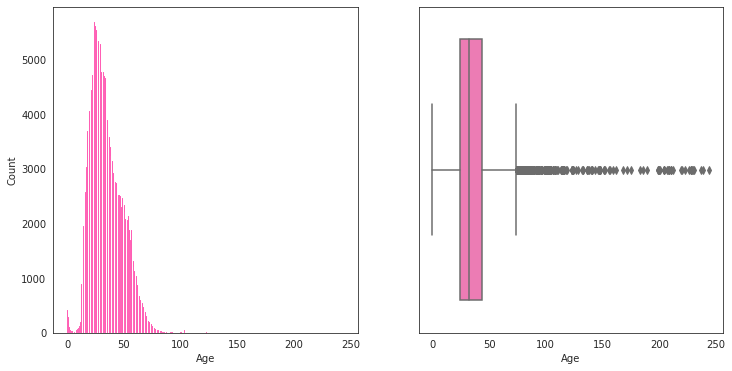

In [47]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users_df,color='deeppink')

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users_df,color="hotpink")

Most of the users are from the age group 25-50.

It is highly unlikely to have users under the age of 4 and above 100.The peaks near 0 and 100 in the kdeplot indicates that there are some outlier values in the 'Age' column

It is highly unlikely to have users of age above 95 and below 4 in this case.Let's replace these values with np.nan

In [48]:
#replacing the outliers in 'Age' with NaN value
users_df.loc[(users_df['Age']>95)|(users_df['Age']<4),'Age']=np.nan

In [49]:
#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',users_df['Age'].isnull().sum())
#Imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users_df['Age'].describe()

The number of missing values is  112001


count    166857.000000
mean         34.734222
std          13.621521
min           4.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          95.000000
Name: Age, dtype: float64

In [50]:
#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',users_df['Age'].isnull().sum())
#Imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users_df['Age'].describe()

The number of missing values is  112001


count    166857.000000
mean         34.734222
std          13.621521
min           4.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          95.000000
Name: Age, dtype: float64

In [51]:
#after imputation
users_df.Age.describe()

count    166857.000000
mean         34.734222
std          13.621521
min           4.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          95.000000
Name: Age, dtype: float64

In [52]:
# missing values in 'Age' column
(users_df['Age'].isnull().sum())

112001

In [53]:
def age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [54]:
users_df['Age_group']=users_df['Age'].apply(lambda x: age_group(x))

The missing values in the 'Age' column have been imputed with values from a normal distribution

Now let's inspect the 'Location' column.

In [55]:
#number of unique values in 'Location'
users_df['Location'].nunique()

57339

In [56]:
#extracting the country names from users_df
for i in users_df:
    users_df['Country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')
#Displaying the country names
set(users_df['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [57]:
#correcting the mispelled country names
users_df.loc[users_df['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users_df.loc[users_df['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users_df.loc[users_df['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users_df.loc[users_df['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users_df.loc[users_df['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users_df.loc[users_df['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users_df.loc[users_df['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users_df['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'])

0              usa
1              usa
2           russia
3         portugal
4               uk
            ...   
278853         usa
278854          uk
278855      canada
278856         usa
278857     ireland
Name: Country, Length: 278858, dtype: object

In [58]:
#Converting the country names to uppercase
users_df['Country']=users_df['Country'].str.upper()

In [59]:
#Dropping the column 'Location'
users_df.drop('Location',axis=1,inplace=True)

In [60]:
users_df.columns

Index(['User-ID', 'Age', 'Age_group', 'Country'], dtype='object')

In [61]:
users_df.Country.value_counts()

USA         139746
CANADA       21658
UK           18565
GERMANY      17073
SPAIN        13258
             ...  
CARTER           1
MYANMAR          1
RAPIDES          1
ESSEX            1
HERNANDO         1
Name: Country, Length: 483, dtype: int64

# **Ratings data**

# Data description

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [62]:
#displaying  5 random rows
rating_df.sample(5)

,User-ID,ISBN,Book-Rating
79608,16795,0515093203,0
638885,154017,0345432711,0
990616,238120,157324127X,0
844416,204522,0671739743,0
99581,23141,2070378187,0


In [63]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [64]:
# checking null values
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [65]:
# checking for unique user ids and isbn values
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating_df['User-ID'].nunique(), rating_df['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556


This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.

In [66]:
 #making all the ISBN no. uppercase
rating_df['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [67]:
## checking for duplicates
rating_df[rating_df.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [68]:
# lets see if all the books in rating_df are also in books_df
rating_df_new = rating_df[rating_df['ISBN'].isin(books_df['ISBN'])]

In [69]:
print('Shape of rating_df: {} and rating_df_new: {}'.format(rating_df.shape, rating_df_new.shape))

Shape of rating_df: (1149780, 3) and rating_df_new: (1030617, 3)


In [70]:
# book ratings
rating_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374


We can see for explicit ratings that rating 8 is received by most number of books followed by rating 10. There are 646974 implicitely rated books.

In [71]:
# most popular books
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585


but this contains both explicit and implicit rating, so we need to seperate them to get better idea.

In [72]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [73]:
# most purchased books including the implicitely rated books
rating_df_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [74]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far
118,0671027360,Angels &amp; Demons,DAN BROWN,2001.0,Pocket Star
305,044023722X,A Painted House,JOHN GRISHAM,2001.0,Dell Publishing Company
356,0142001740,The Secret Life of Bees,SUE MONK KIDD,2003.0,Penguin Books
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),BILLIE LETTS,1998.0,Warner Books
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial
1922,067976402X,Snow Falling on Cedars,DAVID GUTERSON,1995.0,Vintage Books USA


In [75]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


In [76]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial


therefore the most popular book is 'The Lovely Bones: A Novel'